# Breast Cancer: Malignant Or Benign
### Predict
Breast cancer cell classification using K-Nearest Neighbor classifier. Use the dataset of file wisc_bc_data.csv. Use the following settings to design the classifier:
-	Min-max feature normalization.
-	Out of 569 data samples use the 1 to 469 for creating training dataset. Use rest of the samples to estimate the accuracy of the classifier.
-	Calculate the accuracies for K = 9, 11, 13, 15, 17 and 19


In [1]:
import pandas as pd
import numpy as np 
#Read the dataset using pandas
df = pd.read_csv('wisc_bc_data.csv')

##  Exploratory data analysis
Printing first 5 rows of the train dataset.

In [2]:
df.head(5)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


### Data Dictionary
- radius_mean
- texture_mean
- perimeter_mean
- area_mean
- smoothness_mean
- compactness_mean
- concavity_mean
- concave points_mean
- symmetry_mean
- fractal_dimension_mean
- radius_se
- texture_se
- perimeter_se
- area_se
- smoothness_se
- compactness_se
- concavity_se
- concave points_se
- symmetry_se
- fractal_dimension_se
- radius_worst
- texture_worst
- perimeter_worst
- area_worst
- smoothness_worst
- compactness_worst
- concavity_worst
- concave points_worst
- symmetry_worst
- fractal_dimension_worst

In [3]:
df.shape

(569, 32)

###  Totaal rows = 569, Total columns = 33

In [4]:
#check if all the columns have numerical values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
id                         569 non-null int64
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non

In [5]:
#check if there are any null cells in dataset
df.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [6]:
#preprocessing
#map diagnosis to numerical values 1,0 for M & B respectively
def diagnosis_mapping(diagnosis): 
    if diagnosis == 'M': 
        return 1
    else: 
        return 0
    
df['diagnosis'] = df['diagnosis'].apply(diagnosis_mapping) 

In [7]:
#extracting only featues from whole dataset 
X = np.array(df.iloc[:, 2:])

#extracting only lables from whole dataset
y = np.array(df['diagnosis'])

In [8]:
#Min-max feature normalization [0,1] using sklearn
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
X = min_max_scaler.fit_transform(X)
print(X)

[[0.52103744 0.0226581  0.54598853 ... 0.91202749 0.59846245 0.41886396]
 [0.64314449 0.27257355 0.61578329 ... 0.63917526 0.23358959 0.22287813]
 [0.60149557 0.3902604  0.59574321 ... 0.83505155 0.40370589 0.21343303]
 ...
 [0.45525108 0.62123774 0.44578813 ... 0.48728522 0.12872068 0.1519087 ]
 [0.64456434 0.66351031 0.66553797 ... 0.91065292 0.49714173 0.45231536]
 [0.03686876 0.50152181 0.02853984 ... 0.         0.25744136 0.10068215]]


In [9]:
#Dividing samples into train and test data 
#Out of 569 data samples using the 1 to 469 for creating training dataset. Using rest of the samples to estimate the accuracy of the classifier
X_train, X_test = X[:469,:], X[469:,:]
y_train, y_test = y[:469], y[469:]

In [10]:
#importing KNN model from sklearn
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
list_K = [9,11,13,15,17,19] #making a list of ks given in the question
scores = {}
scores_list = []
for k in list_K:  
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train,y_train)    #training the model
    y_pred = knn.predict(X_test) #testing the model
    scores[k] = metrics.accuracy_score(y_test,y_pred)
    scores_list.append(metrics.accuracy_score(y_test,y_pred))
scores #stored dictionary of k with their accuracies as key

{9: 0.98, 11: 0.98, 13: 0.97, 15: 0.98, 17: 0.98, 19: 0.98}

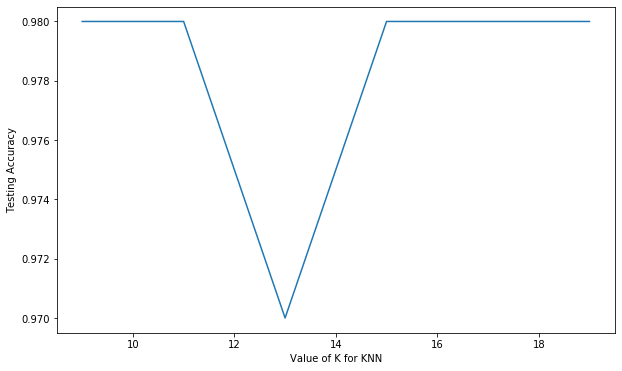

In [11]:
#ploting k and acuracies
from matplotlib import pyplot as plt
%matplotlib inline
plt.figure(figsize = (10, 6)) 
plt.plot(list_K,scores_list) 
plt.xlabel('Value of K for KNN') 
plt.ylabel('Testing Accuracy') 
plt.show() 